In [2]:
# check version
from pycaret.utils import version
version()

'2.3.6'

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\jloom\Desktop\hub_projects\credit_card_churn\credit_card_pycaret_pred\pycaret_data_dummies_credit_cart.csv")

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,1,0,0,0,0,1,0,0,0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,1,0,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,...,0,0,0,0,1,0,1,0,0,0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,...,0,1,0,0,0,0,1,0,0,0


In [7]:
from pycaret.classification import *

In [8]:
# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
clf=setup(data=df,target='Attrition_Flag')

,Description,Value
0,session_id,7940
1,Target,Attrition_Flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10127, 38)"
5,Missing Values,0
6,Numeric Features,10
7,Categorical Features,27
8,Ordinal Features,0
9,High Cardinality Features,0


### we choose the best model

In [9]:
# This model will be used to compare all the model along with the cross validation
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9736,0.9939,0.8921,0.9389,0.9145,0.8989,0.8996,0.1200
gbc,Gradient Boosting Classifier,0.9636,0.9882,0.8287,0.9346,0.8778,0.8565,0.8591,0.6140
ada,Ada Boost Classifier,0.9577,0.9844,0.8358,0.8911,0.8618,0.8369,0.8380,0.1870
rf,Random Forest Classifier,0.9478,0.9841,0.7261,0.9297,0.8144,0.7846,0.7933,0.3770
dt,Decision Tree Classifier,0.9367,0.8805,0.7984,0.8025,0.7997,0.7622,0.7626,0.0620
et,Extra Trees Classifier,0.9199,0.9638,0.5379,0.9267,0.6794,0.6374,0.6689,0.3890
lda,Linear Discriminant Analysis,0.9161,0.9297,0.6441,0.7870,0.7078,0.6594,0.6643,0.0890
ridge,Ridge Classifier,0.9090,0.0000,0.4951,0.8809,0.6325,0.5852,0.6176,0.0310
lr,Logistic Regression,0.9031,0.9175,0.5647,0.7619,0.6479,0.5932,0.6026,1.1440
nb,Naive Bayes,0.8998,0.8892,0.6467,0.6984,0.6710,0.6121,0.6131,0.0270


### This is the id of each model for using them as name

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### create the model

In [11]:
#light GBM Model
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9647,0.9907,0.9027,0.8793,0.8908,0.8698,0.8699
1,0.9774,0.9948,0.9018,0.9528,0.9266,0.9133,0.9138
2,0.9732,0.9938,0.8661,0.9604,0.9108,0.8951,0.8967
3,0.9732,0.9895,0.8839,0.9429,0.9124,0.8966,0.8973
4,0.9676,0.9945,0.8661,0.9238,0.8940,0.8749,0.8755
5,0.9760,0.9973,0.9107,0.9358,0.9231,0.9089,0.9090
6,0.9788,0.9958,0.9286,0.9369,0.9327,0.9202,0.9202
7,0.9718,0.9943,0.8571,0.9600,0.9057,0.8891,0.8911
8,0.9760,0.9929,0.9107,0.9358,0.9231,0.9089,0.9090
9,0.9774,0.9954,0.8929,0.9615,0.9259,0.9126,0.9135


In [12]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7940, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Tuning the hyperparametes for better performance

In [13]:
#Hyper params tuning via tune_model
tuned_lgbm  = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9647,0.9902,0.9115,0.8729,0.8918,0.8707,0.8710
1,0.9746,0.9934,0.9018,0.9352,0.9182,0.9032,0.9034
2,0.9704,0.9924,0.8661,0.9417,0.9023,0.8849,0.8860
3,0.9676,0.9889,0.8929,0.9009,0.8969,0.8776,0.8776
4,0.9647,0.9947,0.8571,0.9143,0.8848,0.8640,0.8646
5,0.9774,0.9968,0.9196,0.9364,0.9279,0.9146,0.9146
6,0.9760,0.9950,0.9196,0.9279,0.9238,0.9095,0.9096
7,0.9704,0.9954,0.8839,0.9252,0.9041,0.8866,0.8869
8,0.9718,0.9904,0.9018,0.9182,0.9099,0.8932,0.8932
9,0.9788,0.9967,0.9018,0.9619,0.9309,0.9184,0.9190


In [14]:
tuned_lgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.1, n_estimators=270, n_jobs=-1, num_leaves=256,
               objective=None, random_state=7940, reg_alpha=0.3, reg_lambda=0.7,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

### Plotting ROC for initial/basic model

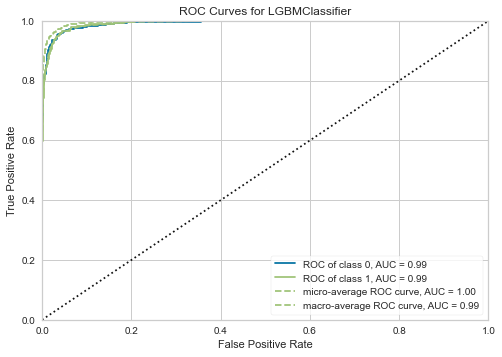

In [15]:
plot_model(lgbm)

### Plotting ROC for hyper parameters tuned model

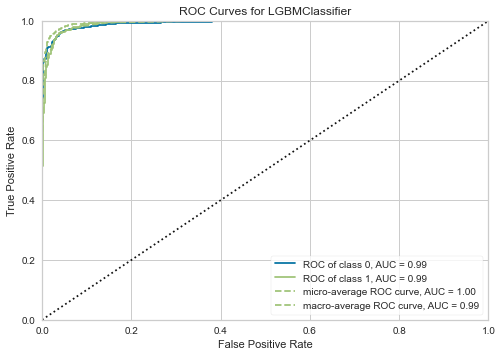

In [16]:
plot_model(tuned_lgbm)

#### This is an interesting way of seeing how our model create boundry and how it fits the space of features, below you can see our model is overfit

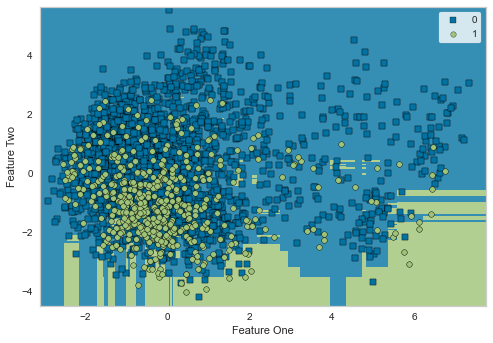

In [17]:
plot_model(lgbm , plot = 'boundary')

#### Do you see the difference in boundries of models (normal and tuned)

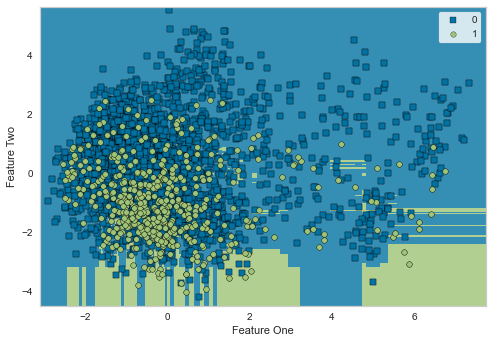

In [18]:
plot_model(tuned_lgbm, plot = 'boundary')

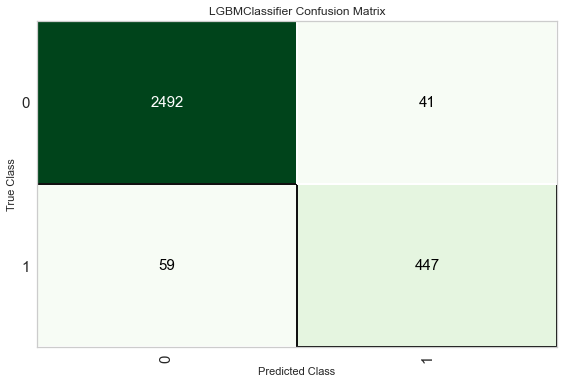

In [19]:
plot_model(lgbm, plot = 'confusion_matrix')

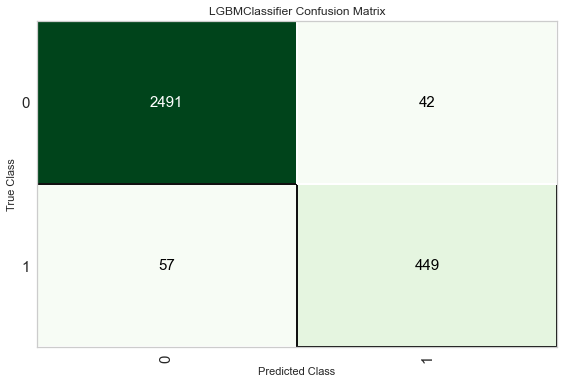

In [20]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

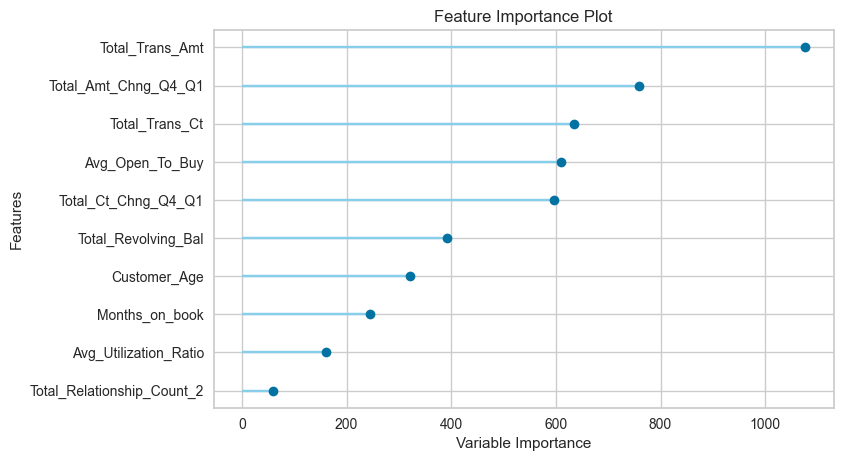

In [21]:
plot_model(tuned_lgbm, plot = 'feature')

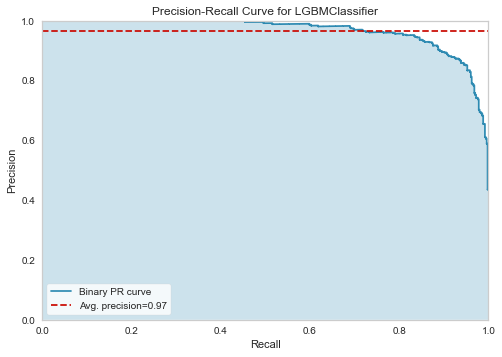

In [22]:
plot_model(tuned_lgbm, plot = 'pr')

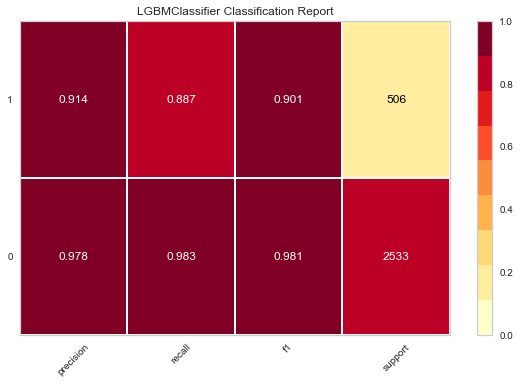

In [23]:
plot_model(tuned_lgbm, plot = 'class_report')

In [24]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

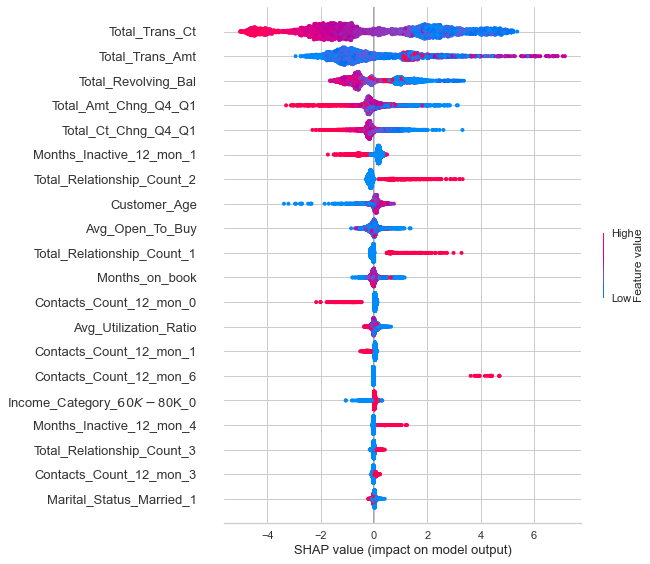

In [27]:
interpret_model(lgbm)

In [28]:
interpret_model(lgbm, plot = 'reason', observation = 12)

In [29]:
pred_holdouts = predict_model(lgbm)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9671,0.9923,0.8834,0.9160,0.8994,0.8797,0.8799


,Customer_Age,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Dependent_count_0,...,Income_Category_$80K - $120K_0,Income_Category_Less than $40K_0,Income_Category_Unknown_1,Card_Category_Blue_1,Card_Category_Gold_0,Card_Category_Platinum_1,Card_Category_Silver_1,Attrition_Flag,Label,Score
0,43.0,38.0,1421.0,1129.0,0.819,8063.0,72.0,0.714,0.557,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.9650
1,53.0,44.0,1073.0,33443.0,0.558,4485.0,86.0,0.755,0.031,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0.9997
2,47.0,36.0,0.0,1636.0,0.694,2235.0,35.0,0.591,0.000,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0.9982
3,46.0,33.0,0.0,2879.0,1.031,4684.0,56.0,0.556,0.000,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0.9778
4,50.0,45.0,1156.0,633.0,0.748,5110.0,75.0,0.630,0.646,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.9998


In [30]:
predict_new = predict_model(tuned_lgbm, data=df)
predict_new.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Label,Score
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,1,0,0,0,0,0.9999
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,1,0,1,0,0,0,0,0.9999
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,1,0,0,0,0,0.9997
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,1,0,1,0,0,0,0,0.9983
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,1,0,0,0,0,0.9646
